# 子类化内置类型的问题
CPython版本的内置类型（C实现）不会调用用户定义的子类的覆盖的特殊方法,这违背了面向对象的基本准则：首先从实例所属的类中搜索属性或方法。

In [1]:
class DoppelDict(dict):
    def __setitem__(self, key, value):
        # value为两个相同元素的list
        super().__setitem__(key, [value] * 2)

# 未调用覆盖的__setitem__
dd = DoppelDict(one=1)
dd

{'one': 1}

In [2]:
# 调用了覆盖的__setitem__
dd['two'] = 2
dd

{'one': 1, 'two': [2, 2]}

In [4]:
# 未调用覆盖的__setitem__
dd.update(three=3)
dd

{'one': 1, 'two': [2, 2], 'three': 3}

#### 不要子类化内置类型，用户自定义的类应该继承collections模块，如UserDict、UserList、UserString，这些类做了特殊设计（Python实现而非C实现）因此可扩展。

# 多重继承的方法解析顺序
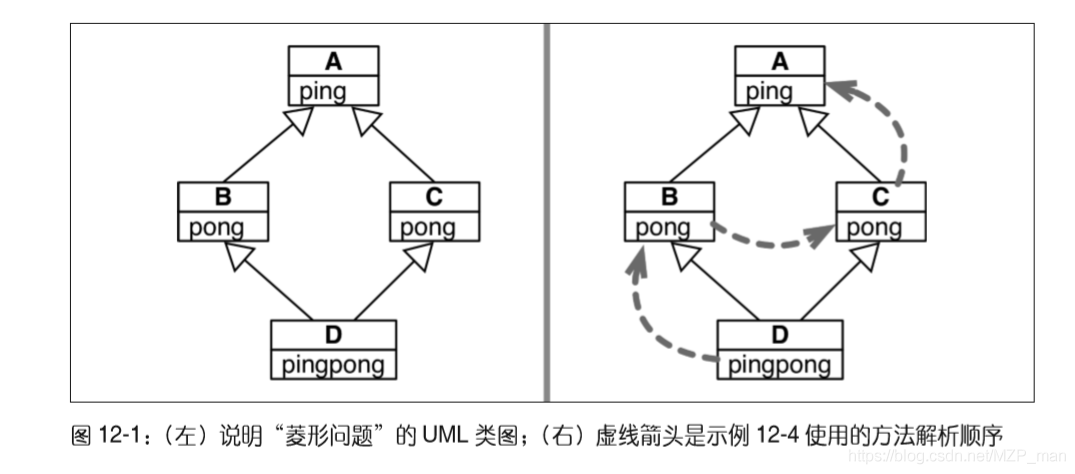
类的\__mro__是一个元祖，存储着方法解析顺序的各个超类class对象的引用, 同级父类的方法解析顺序取决于被继承时的顺序。

In [14]:
class A:
    def ping(self):
        print('pingA', self)

class B(A):
    def pong(self):
        print('pongB', self)

class C(A):
    def pong(self):
        print('pongC', self)
        
class D(B, C):
    def ping(self):
        super().ping()
        print('post-ping', self)
        
    def pingpong(self):
        self.ping()
        super().ping()
        self.pong()
        super().pong()
        # 直接调用类的方法，需要将实例self显示传入,相当于访问未绑定方法,可以绕过方法解析顺序
        C.pong(self)
        
print(D.__mro__)

(<class '__main__.D'>, <class '__main__.C'>, <class '__main__.B'>, <class '__main__.A'>, <class 'object'>)


In [12]:
d=D()
d.ping()

pingA <__main__.D object at 0x000001FF2204CDA0>
post-ping <__main__.D object at 0x000001FF2204CDA0>


In [15]:
d.pingpong()

pingA <__main__.D object at 0x000001FF2204CDA0>
post-ping <__main__.D object at 0x000001FF2204CDA0>
pingA <__main__.D object at 0x000001FF2204CDA0>
pongB <__main__.D object at 0x000001FF2204CDA0>
pongB <__main__.D object at 0x000001FF2204CDA0>
pongC <__main__.D object at 0x000001FF2204CDA0>


# 多重继承的真实应用